# Function rgb2hsv

## Synopse
Convert RGB to HSV image.

- **g = rgb2hsv(rgb_img) **

    - **g**: Image.
    - **rgb_img**: Image rgb.

In [1]:
def rgb2hsv(rgb_img):
    
    import numpy as np
    
    r = rgb_img[:,:,0].ravel()
    g = rgb_img[:,:,1].ravel()
    b = rgb_img[:,:,2].ravel()
    
    hsv_map = map(rgb2hsvmap, r, g, b)
    hsv_img = np.array(list(hsv_map)).reshape(rgb_img.shape)
    
    return hsv_img

def rgb2hsvmap(r, g, b):
    
    maxc = max(r, g, b)
    minc = min(r, g, b)

    # HSV: Hue, Saturation, Value
    # H: position in the spectrum
    # S: color saturation ("purity")
    # V: color brightness
    
    v = maxc
    if minc == maxc:
        return 0.0, 0.0, v

    s = (maxc-minc) / maxc
    rc = (maxc-r) / (maxc-minc)
    gc = (maxc-g) / (maxc-minc)
    bc = (maxc-b) / (maxc-minc)
    
    if r == maxc:
        h = bc-gc

    elif g == maxc:
        h = 2.0+rc-bc

    else:
        h = 4.0+gc-rc

    h = (h/6.0) % 1.0
    
    #tonalidade variando de 0 a 360, indicando o ângulo no circulo aonde a tonalidade (H) está definido, 
    #e a saturação e o brilho variando de 0.0 a 1.0, representando o menor e o maior valor possível

    return h, s, v
#adapted from python source code (Lib/colorsys.py - rgb_to_hsv(r, g, b))

## Description
Returns a image using HSV color model: the H (Hue), S (Saturation), V (Value) of a RGB image. The HSV model is a representation in cylindrical coordinates of the points of the RGB version.

## Examples
- **Example 1**

rgb_img.shape:  (257, 256, 3)
r:  [ 59  42   0 ..., 175 161 162]
g:  [ 93  74  24 ..., 153 137 138]
b:  [ 92  71  20 ..., 142 127 128]
hsv_img.shape:  (257, 256, 3)
h:  [ 0.49509804  0.484375    0.47222222 ...,  0.05555555  0.0490196   0.0490196 ]
s:  [ 0.36559141  0.43243244  1.         ...,  0.18857142  0.21118012
  0.20987654]
v:  [  93.   74.   24. ...,  175.  161.  162.]


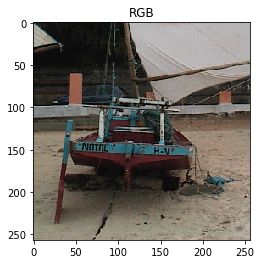

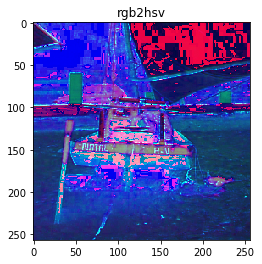

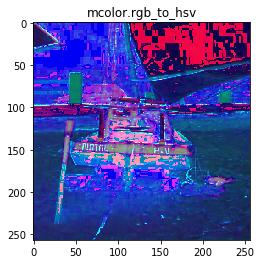

In [2]:
testing = (__name__ == "__main__")
if testing:
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import numpy as np
    import matplotlib.colors as mcolor

    rgb_img = mpimg.imread('/etc/jupyterhub/ia898_1s2017/ia898/data/boat.tif')
    print('rgb_img.shape: ' , rgb_img.shape)

    plt.figure(1)
    plt.title('RGB')
    plt.imshow(rgb_img)

    r = rgb_img[:,:,0].ravel()
    g = rgb_img[:,:,1].ravel()
    b = rgb_img[:,:,2].ravel()

    print('r: ', r)
    print('g: ',g)
    print('b: ',b)

    hsv_img = rgb2hsv(rgb_img)
    print('hsv_img.shape: ' , hsv_img.shape)

    h = hsv_img[:,:,0].ravel()
    s = hsv_img[:,:,1].ravel()
    v = hsv_img[:,:,2].ravel()

    plt.figure(2)
    plt.title('rgb2hsv')
    plt.imshow(hsv_img)

    mcolor_hsv = mcolor.rgb_to_hsv(rgb_img)
    plt.figure(3)
    plt.title('mcolor.rgb_to_hsv')
    plt.imshow(mcolor_hsv)

    print('h: ', h)
    print('s: ',s)
    print('v: ',v)

- **Example 2**

Shape:  (2, 3, 3)


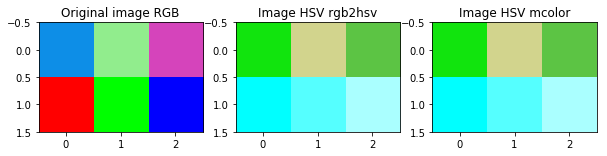

In [3]:
if testing:
    import sys,os
    ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

    pixels = np.array([
        [[243., 114., 25.],
        [111., 19., 115.],
        [43., 188., 69.]],

        [[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]
    ])

    print("Shape: ", pixels.shape)
    hsv_img = rgb2hsv(pixels)

    fig = plt.figure(figsize=(10, 10))

    fig.add_subplot(1, 3, 1) 
    plt.imshow(pixels)
    plt.title('Original image RGB')

    fig.add_subplot(1, 3, 2) 
    plt.imshow(hsv_img, cmap='hsv')
    plt.title('Image HSV rgb2hsv')

    mcolor_hsv = mcolor.rgb_to_hsv(pixels.copy())

    fig.add_subplot(1, 3, 3) 
    plt.imshow(mcolor_hsv, cmap='hsv')
    plt.title('Image HSV mcolor')

    plt.show()

## Contributions

Lucas de Vasconcellos Teixeira, 1st semester 2017